In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# Load dataset from  CSV
insurance_df = pd.read_csv('Medical_Insurance_Dataset.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Dataset insight and overview
print("Dataset Shape:", insurance_df.shape)
print("\nColumns & Data Types:")
print(insurance_df.dtypes)
print("\nSummary Statistics:")
print(insurance_df.describe())
print("\nMissing Values in Each Column:")
print(insurance_df.isnull().sum())


Dataset Shape: (2772, 7)

Columns & Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Summary Statistics:
               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010

Missing Values in Each Column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


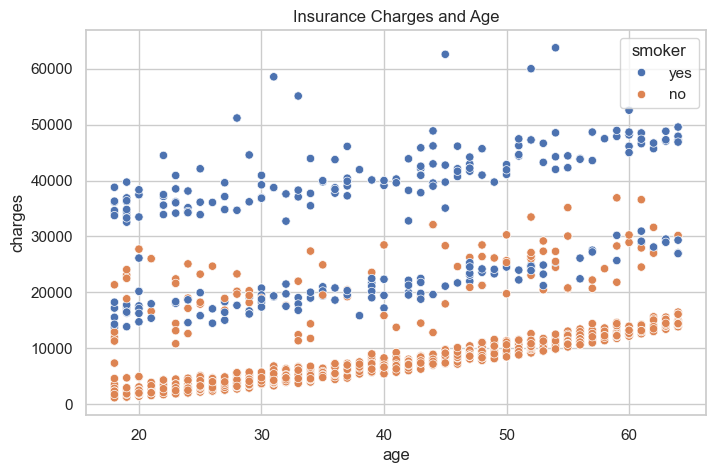

In [7]:
# Data Visualization
sns.set(style="whitegrid")

# Scatterplots: Charges and Age
plt.figure(figsize=(8,5))
sns.scatterplot(data=insurance_df, x='age', y='charges', hue='smoker')
plt.title('Insurance Charges and Age')
plt.show()



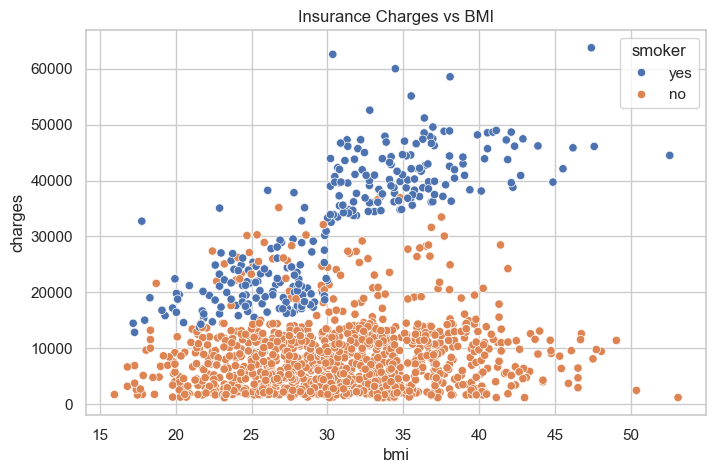

In [8]:
# Scatterplots: Charges and BMI
plt.figure(figsize=(8,5))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker')
plt.title('Insurance Charges vs BMI')
plt.show()




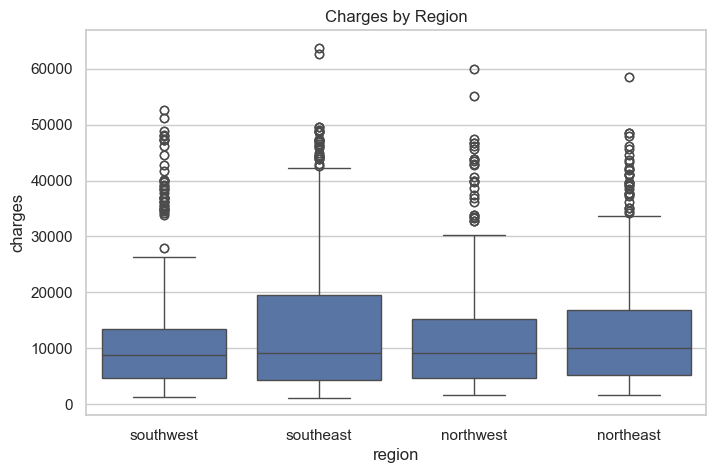

In [9]:
# Boxplot: Charges by Region
plt.figure(figsize=(8,5))
sns.boxplot(data=insurance_df, x='region', y='charges')
plt.title('Charges by Region')
plt.show()



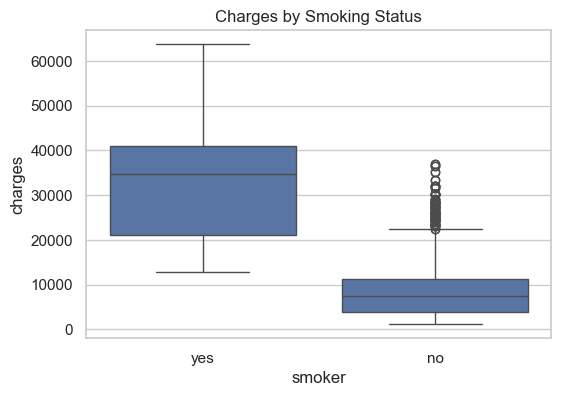

In [10]:
# Boxplot: Charges by Smoking Status
plt.figure(figsize=(6,4))
sns.boxplot(data=insurance_df, x='smoker', y='charges')
plt.title('Charges by Smoking Status')
plt.show()



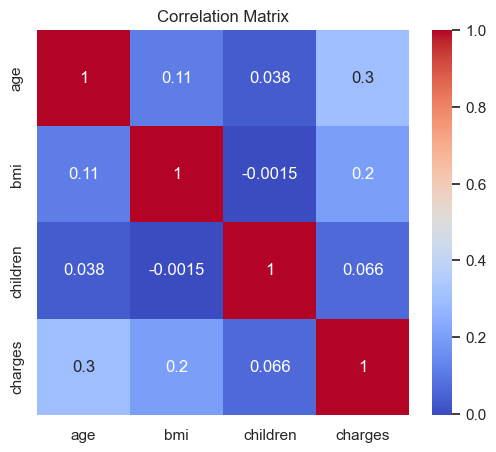

In [11]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
corr = insurance_df[['age','bmi','children','charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#preprocessing of categorical data
df = insurance_df.copy()
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
#Train test Split
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (2217, 6)
Testing Features Shape: (555, 6)


In [26]:
#lineear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print(f"RMSE: {rmse_lin:.2f}, MAE: {mae_lin:.2f}, R2: {r2_lin:.4f}")



Linear Regression Performance:
RMSE: 6318.42, MAE: 4167.30, R2: 0.7399


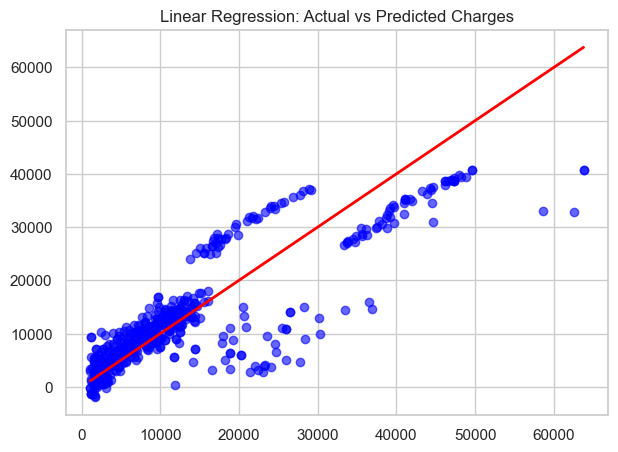

In [27]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lin, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted Charges")
plt.show()


In [28]:
#Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Performance:")
print(f"RMSE: {rmse_dt:.2f}, MAE: {mae_dt:.2f}, R2: {r2_dt:.4f}")




Decision Tree Regression Performance:
RMSE: 4668.19, MAE: 2535.47, R2: 0.8580


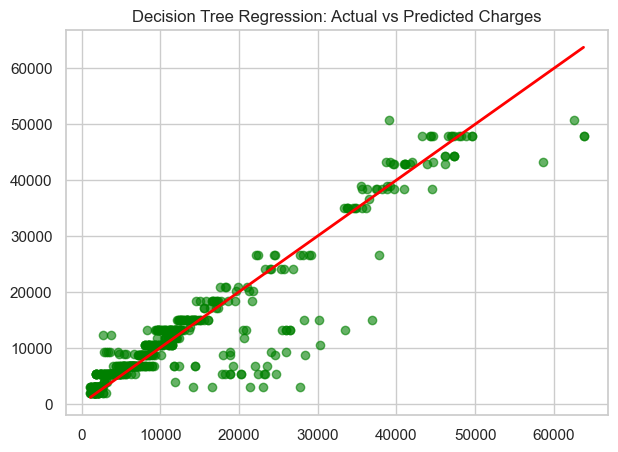

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Decision Tree Regression: Actual vs Predicted Charges")
plt.show()

In [30]:
# Random Forest Regression

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance:")
print(f"RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.4f}")


Random Forest Regression Performance:
RMSE: 4588.86, MAE: 2419.28, R2: 0.8628


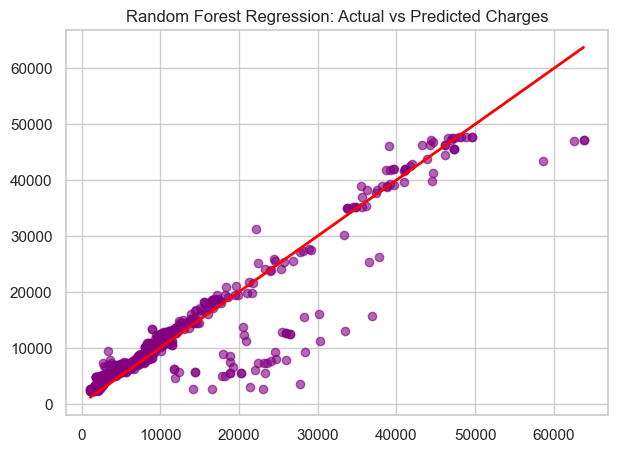

In [31]:

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Random Forest Regression: Actual vs Predicted Charges")
plt.show()




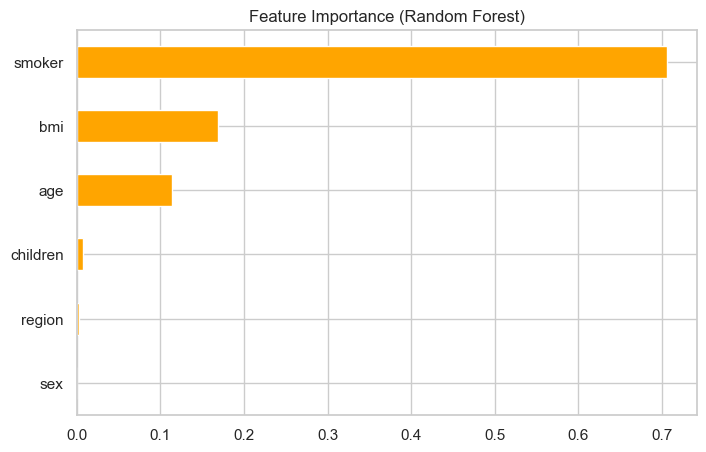

In [32]:
feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
feature_importances.sort_values().plot(kind='barh', color='orange')
plt.title("Feature Importance (Random Forest)")
plt.show()

In [35]:
# Model Evaluation
performance_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"],
    "RMSE": [rmse_lin, rmse_dt, rmse_rf],
    "MAE": [mae_lin, mae_dt, mae_rf],
    "R2 Score": [r2_lin, r2_dt, r2_rf]
})

print("Model Performance Comparison:")
display(performance_df)


Model Performance Comparison:


,Model,RMSE,MAE,R2 Score
0,Linear Regression,6318.423803,4167.301436,0.739886
1,Decision Tree Regression,4668.185983,2535.467617,0.858015
2,Random Forest Regression,4588.856410,2419.284039,0.862800


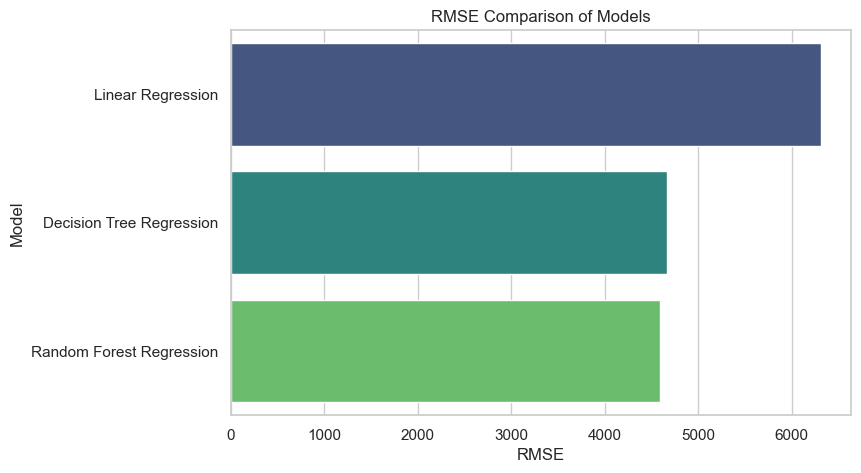

In [22]:
#RMSE comparison
plt.figure(figsize=(8,5))
sns.barplot(x="RMSE", y="Model", data=performance_df, palette="viridis")
plt.title("RMSE Comparison of Models")
plt.show()


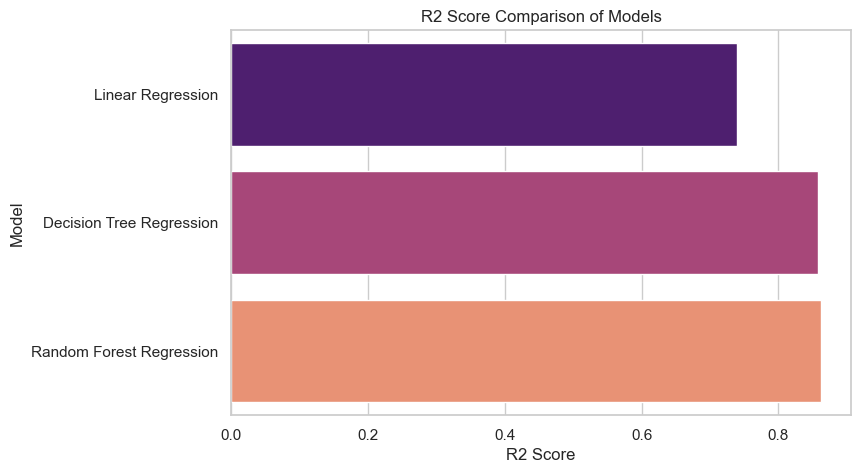

In [36]:
# R2 comparison
plt.figure(figsize=(8,5))
sns.barplot(x="R2 Score", y="Model", data=performance_df, palette="magma")
plt.title("R2 Score Comparison of Models")
plt.show()

In [39]:
#Final Output
best_model_name = performance_df.loc[performance_df['RMSE'].idxmin(), 'Model']
print(f"Best Model Selected: {best_model_name}")

if best_model_name == "Linear Regression":
    best_model = lin_reg
elif best_model_name == "Decision Tree Regression":
    best_model = dt_reg
else:
    best_model = rf_reg

final_predictions = best_model.predict(X_test)
results_df = pd.DataFrame({
    "Actual Charges": y_test,
    "Predicted Charges": final_predictions
})
results_df.head(10)

results_df.to_csv("insurance_predictions.csv", index=False)
print("Final predictions saved to 'insurance_predictions.csv'")


Best Model Selected: Random Forest Regression
Final predictions saved to 'insurance_predictions.csv'


In [40]:
#sample data
sample_data = pd.DataFrame({
    "age": [25, 40, 60, 30, 50, 22, 35, 45, 55, 28],
    "sex": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],         
    "bmi": [22.0, 28.5, 31.2, 26.0, 33.0, 21.5, 29.0, 27.5, 30.0, 24.0],
    "children": [0, 2, 3, 1, 2, 0, 1, 3, 4, 0],
    "smoker": [0, 1, 1, 0, 0, 0, 1, 0, 1, 0],        
    "region": [0, 2, 1, 3, 0, 3, 2, 1, 0, 2]         
})


predictions = best_model.predict(sample_data)


sample_data["Predicted Charges"] = predictions
print(sample_data)

   age  sex   bmi  children  smoker  region  Predicted Charges
0   25    1  22.0         0       0       0        5075.017264
1   40    0  28.5         2       1       2       21843.791338
2   60    1  31.2         3       1       1       46353.096066
3   30    0  26.0         1       0       3        5165.994421
4   50    1  33.0         2       0       0       11922.952932
5   22    0  21.5         0       0       3        2409.498015
6   35    1  29.0         1       1       2       19900.122155
7   45    0  27.5         3       0       1        9275.672382
8   55    1  30.0         4       1       0       32421.880817
9   28    0  24.0         0       0       2        4925.216691
